# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
project_data=project_data.sample(n=25000,random_state=0)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(' ')


In [3]:
y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

Number of projects thar are approved for funding  21160 , ( 84.64 %)
Number of projects thar are not approved for funding  3840 , ( 15.36 %)


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (25000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
75155      144107  p064182  7414165942b20a8d7fe5bcdc96244624            Ms.   
77488       89277  p187708  5b42a9aa00917ac1716d8063aebc6318           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
75155           NY        2017-02-05 17:49:01             Grades 3-5   
77488           CA        2016-05-27 14:44:25             Grades 6-8   

                project_title  \
75155           2017 Supplies   
77488  Keep the Spirit Alive!   

                                         project_essay_1  \
75155  Starting the new year off right sets the tone ...   
77488  Have you ever worked so hard on a project only...   

                                         project_essay_2 project_essay_3  \
75155  We need printer ink so we can showcase our won...             NaN   
77488  These Chromebooks will be used in my classroom...             NaN   

      project_essay_4                           project_resource_summary  \
75155             NaN  My students need refills on various supplies f...   
77488             NaN  My students need access to technology like chr...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
75155                                             7                    1   
77488                                             3                    0   

                     clean_categories   clean_subcategories  \
75155  Literacy_Language Math_Science  Literacy Mathematics   
77488                    SpecialNeeds          SpecialNeeds   

                                                   essay  
75155  Starting the new year off right sets the tone ...  
77488  Have you ever worked so hard on a project only...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])


Starting the new year off right sets the tone for months to come. My class will be thrilled to receive basic supplies to help them be successful.\r\n\r\nMy students are curious, inquisitive, and enthusiastic learners who enjoy school.\r\n\r\nOur school is a public community school in New York City that receives Title I funding, which means that many students are eligible for free or reduced price lunch. Most of my students are English language learners. Our self-contained class is comprised of students with disabilities in second and third grade.We need printer ink so we can showcase our wonderful work, and other supplies such as pocket charts for subject-specific word walls.\r\n\r\nThe poetry book will align with our specialized phonics and reading program, and the Reciprocal Teaching Strategies book will help us get where we need to be.\r\n\r\nChart paper is a staple for any literacy or math lesson, and folders will help keep us organized. Ziplock pouches will attach to students' hom

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[0])
print(sent)
print("="*50)

Starting the new year off right sets the tone for months to come. My class will be thrilled to receive basic supplies to help them be successful.\r\n\r\nMy students are curious, inquisitive, and enthusiastic learners who enjoy school.\r\n\r\nOur school is a public community school in New York City that receives Title I funding, which means that many students are eligible for free or reduced price lunch. Most of my students are English language learners. Our self-contained class is comprised of students with disabilities in second and third grade.We need printer ink so we can showcase our wonderful work, and other supplies such as pocket charts for subject-specific word walls.\r\n\r\nThe poetry book will align with our specialized phonics and reading program, and the Reciprocal Teaching Strategies book will help us get where we need to be.\r\n\r\nChart paper is a staple for any literacy or math lesson, and folders will help keep us organized. Ziplock pouches will attach to students' hom

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Starting the new year off right sets the tone for months to come. My class will be thrilled to receive basic supplies to help them be successful.    My students are curious, inquisitive, and enthusiastic learners who enjoy school.    Our school is a public community school in New York City that receives Title I funding, which means that many students are eligible for free or reduced price lunch. Most of my students are English language learners. Our self-contained class is comprised of students with disabilities in second and third grade.We need printer ink so we can showcase our wonderful work, and other supplies such as pocket charts for subject-specific word walls.    The poetry book will align with our specialized phonics and reading program, and the Reciprocal Teaching Strategies book will help us get where we need to be.    Chart paper is a staple for any literacy or math lesson, and folders will help keep us organized. Ziplock pouches will attach to students' homework folders, m

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Starting the new year off right sets the tone for months to come My class will be thrilled to receive basic supplies to help them be successful My students are curious inquisitive and enthusiastic learners who enjoy school Our school is a public community school in New York City that receives Title I funding which means that many students are eligible for free or reduced price lunch Most of my students are English language learners Our self contained class is comprised of students with disabilities in second and third grade We need printer ink so we can showcase our wonderful work and other supplies such as pocket charts for subject specific word walls The poetry book will align with our specialized phonics and reading program and the Reciprocal Teaching Strategies book will help us get where we need to be Chart paper is a staple for any literacy or math lesson and folders will help keep us organized Ziplock pouches will attach to students homework folders making it simple and easy to 

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
def Text_cleaner(data):
    from tqdm import tqdm
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [17]:
# after preprocesing
preprocessed_essays=Text_cleaner(project_data['essay'])

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:15<00:00, 1662.03it/s]


In [18]:
preprocessed_essays[1]

'ever worked hard project get back teacher dismal grade loved one tries hard school not seem grasp concepts students special needs feel everyday create classroom everyone succeeds students mild moderate disabilities disabilities range various levels autism moderate learning disabilities challenges attention classified intellectually impaired students wonderful people face daily challenges could never fathom students come low socioeconomic homes suffering disabilities makes difficult read comprehend write solve math equations using typical learning styles technology way bridge learning gap students struggle every day chromebooks used classroom help students complete common core assignments subject areas students able use technology help 21st century skills needed successful new common core state standards daily life technology make huge impact lives currently teacher computer document camera projector printer one chromebook per two students school computer labs shares entire student bod

In [19]:
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
75155      144107  p064182  7414165942b20a8d7fe5bcdc96244624            Ms.   
77488       89277  p187708  5b42a9aa00917ac1716d8063aebc6318           Mrs.   
7803       123550  p142214  bec515840d4fb7d2ba1071211ba32231           Mrs.   
56268      104617  p098697  8131749e34b7ef3fa0890b5d840deb2a            Ms.   
46902      154452  p252651  d240517694ebcbe54a5ffa806a5ada2e            Ms.   

      school_state project_submitted_datetime project_grade_category  \
75155           NY        2017-02-05 17:49:01             Grades 3-5   
77488           CA        2016-05-27 14:44:25             Grades 6-8   
7803            CA        2016-12-09 19:23:16             Grades 3-5   
56268           NC        2016-06-20 13:27:03             Grades 3-5   
46902           MO        2016-11-09 15:54:10          Grades PreK-2   

                                           project_title  \
75155                                      2017 Supplies   
77488                             Keep the Spirit Alive!   
7803   Captivating Opportunities to practice Computer...   
56268  Filling Our Science Equipment Gaps for Outstan...   
46902                                Brilliant Book Bins   

                                project_resource_summary  \
75155  My students need refills on various supplies f...   
77488  My students need access to technology like chr...   
7803   My students need more opportunities to interac...   
56268  My students need hands-on materials to improve...   
46902  My students need sturdy containers to hold the...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
75155                                             7                    1   
77488                                             3                    0   
7803                                              0                    1   
56268                                             1                    1   
46902                                             6                    1   

                     clean_categories  \
75155  Literacy_Language Math_Science   
77488                    SpecialNeeds   
7803                     Math_Science   
56268                    Math_Science   
46902               Literacy_Language   

                           clean_subcategories  \
75155                     Literacy Mathematics   
77488                             SpecialNeeds   
7803               AppliedSciences Mathematics   
56268  EnvironmentalScience Health_LifeScience   
46902                                 Literacy   

                                                   essay  
75155  starting new year right sets tone months come ...  
77488  ever worked hard project get back teacher dism...  
7803   students come class every day ready learn eage...  
56268  love science class cj exclaimed came door past...  
46902  students caring outgoing creative second grade...

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
preprocessed_project_title=Text_cleaner(project_data['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 38298.82it/s]


In [21]:
preprocessed_project_title[1]

'keep spirit alive'

In [22]:
project_data['Cleaned_title']=preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [23]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'Cleaned_title',
       'price', 'quantity'],
      dtype='object')

In [25]:
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.drop(['Unnamed: 0'], axis=1, inplace=True)
project_data.drop(['id'], axis=1, inplace=True)
project_data.drop(['teacher_id'], axis=1, inplace=True)



### adding the count of letter in each essay as a new data coloumn

In [26]:
project_data['essay_count']=project_data['essay'].str.len()
project_data['title_count']=project_data['Cleaned_title'].str.len()

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Declare the Dependant and independant variables

In [27]:
#https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
X=project_data.loc[:, project_data.columns != 'project_is_approved']
y=project_data['project_is_approved']
X.shape

(25000, 13)

### Vectorize the Features

In [28]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X['clean_categories'].values)
feature_names_bow=[]
feature_names_tfidf=[]
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories=vectorizer.transform(X['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_categories.shape)
feature_names_bow.append(vectorizer.get_feature_names())
feature_names_tfidf.append(vectorizer.get_feature_names())

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix after one hot encodig  (25000, 9)


In [29]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_categories=vectorizer.transform(X['clean_subcategories'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_sub_categories.shape)
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.append(vectorizer.get_feature_names())

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix after one hot encodig  (25000, 30)


In [30]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X['school_state'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_skl_state=vectorizer.transform(X['school_state'].values)



print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_skl_state.shape)
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.append(vectorizer.get_feature_names())

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (25000, 51)


In [31]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X['teacher_prefix'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix=vectorizer.transform(X['teacher_prefix'].values)



print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_teacher_prefix.shape)
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.append(vectorizer.get_feature_names())

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (25000, 5)


In [32]:
X['project_grade_category']=X['project_grade_category'].str.replace(' ', '')
X['project_grade_category']=X['project_grade_category'].str.replace('-', '')
print(X['project_grade_category'].unique())

['Grades35' 'Grades68' 'GradesPreK2' 'Grades912']


In [33]:

vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X['project_grade_category'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category=vectorizer.transform(X['project_grade_category'].values)



print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_project_grade_category.shape)
feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.append(vectorizer.get_feature_names())

['Grades35', 'Grades68', 'Grades912', 'GradesPreK2']
Shape of matrix after one hot encodig  (25000, 4)


In [34]:
X_train_prev_proj=X['teacher_number_of_previously_posted_projects'][:,np.newaxis]

feature_names_bow.append('teacher_number_of_previously_posted_projects')
feature_names_tfidf.append('teacher_number_of_previously_posted_projects')

print(X_train_prev_proj.shape)

(25000, 1)


In [35]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import MinMaxScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = MinMaxScaler()
price_scalar.fit(X=X['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
X_train_price_standardized = price_scalar.transform(X['price'].values.reshape(-1, 1))

feature_names_bow.extend('price')
feature_names_tfidf.append('price')

print(X_train_price_standardized.shape)

(25000, 1)


In [36]:
quantity_scalar = MinMaxScaler()
quantity_scalar.fit(X['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
X_train_quantity_standardized = quantity_scalar.transform(X['quantity'].values.reshape(-1, 1))

feature_names_bow.extend('quantity')
feature_names_tfidf.append('quantity')

print(X_train_quantity_standardized.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



(25000, 1)


In [37]:
count_scalar = MinMaxScaler()
count_scalar.fit(X['essay_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
X_train_essay_count_standardized = count_scalar.transform(X['essay_count'].values.reshape(-1, 1))

feature_names_bow.extend('essay_count')
feature_names_tfidf.append('essay_count')

print(X_train_essay_count_standardized.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



(25000, 1)


In [38]:
count_scalar = MinMaxScaler()
count_scalar.fit(X['title_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
X_train_title_count_standardized = count_scalar.transform(X['title_count'].values.reshape(-1, 1))

feature_names_bow.extend('title_count')
feature_names_tfidf.append('title_count')

print(X_train_title_count_standardized.shape)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



(25000, 1)


###  TFIDF vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(X['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf=vectorizer.transform(X['essay'].values)



print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)
feature_names_tfidf.append(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (25000, 5000)


In [40]:
# Similarly you can vectorize for title alsovectorizer = TfidfVectorizer(min_df=10)
vectorizer = TfidfVectorizer(min_df=5)

# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer.fit(X['Cleaned_title'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleaned_title_tfidf=vectorizer.transform(X['Cleaned_title'].values)


print("Shape of matrix after one hot encodig ",X_train_cleaned_title_tfidf.shape)
feature_names_tfidf.append(vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (25000, 2121)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [41]:
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_tfidf,X_train_cleaned_title_tfidf,X_train_essay_count_standardized,X_train_title_count_standardized
            )).toarray()



print(X_tfidf.shape)



(25000, 7225)


## use only top 5000 Features using selectKbest

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=5000).fit_transform(X_tfidf, y)

In [43]:
X_new.shape

(25000, 5000)

## Applying Agglomerative Clustering

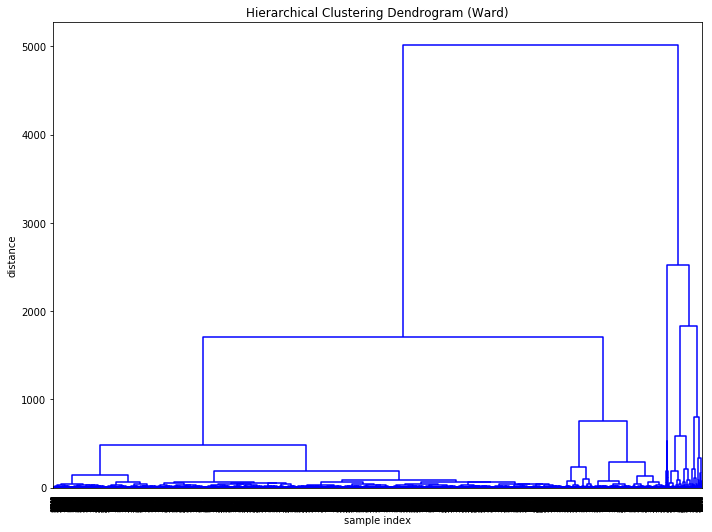

In [44]:
# https://trainingdatascience.com/workshops/hierarchical-clustering---agglomerative/
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_new, 'ward')
figure = plt.figure(figsize=(10, 7.5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()


### Wooohey that’s a lot of legs. Let’s cut a few off to be able to take a better look at the data…

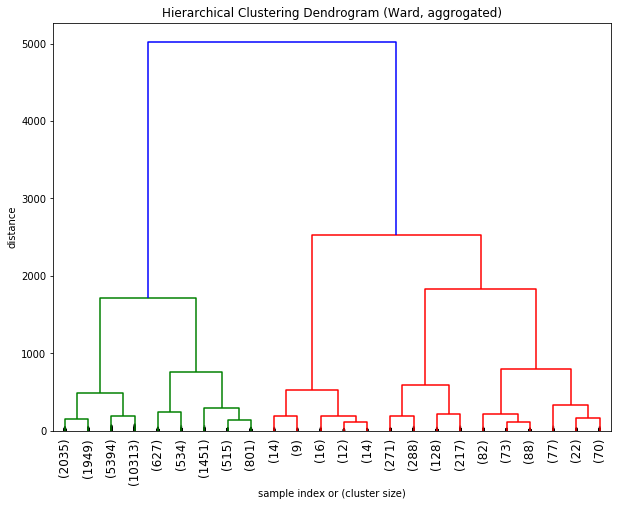

In [45]:
figure = plt.figure(figsize=(10, 7.5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

### From the above dendogram its evident that there are two clusters. 
 --- We can see that the largest vertical distance without any horizontal line passing through it is represented by left blue line.
    
### k=2

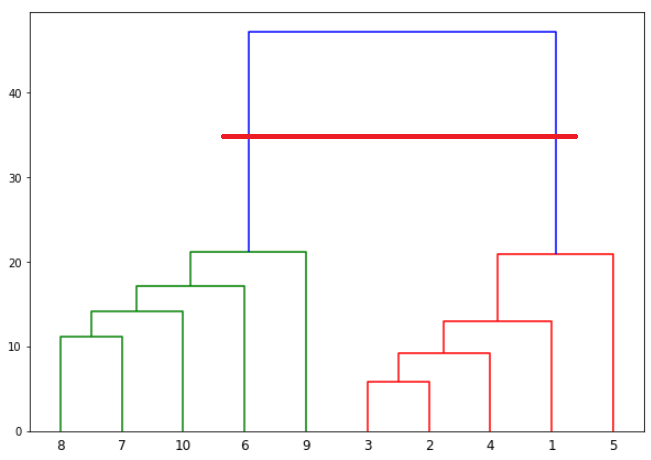

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(X_new)
print("Labels in the cluster:{}".format(cluster.labels_))
test={i: np.where(cluster.labels_ == i)[0] for i in range(cluster.n_clusters)}

Labels in the cluster:[1 1 1 ... 1 1 1]


### Get all the negative and positive essays.

In [47]:
X_negative_essay=X['essay'].iloc[test[0]]
X_positive_essay=X['essay'].iloc[test[1]]

print("Negative Points")
print("="*50)
print(X_negative_essay.head(5))

print("Positive  Points")
print("="*50)
print(X_positive_essay.head(5))

Negative Points
24    try leave earth better place arrived sidney sh...
45    teach english language learners title school s...
76    work west side chicago majority students cross...
95    teach special day class filled awesome student...
96    second grade teacher pennsylvania classroom ma...
Name: essay, dtype: object
Positive  Points
0    starting new year right sets tone months come ...
1    ever worked hard project get back teacher dism...
2    students come class every day ready learn eage...
3    love science class cj exclaimed came door past...
4    students caring outgoing creative second grade...
Name: essay, dtype: object


### Lets Draw the word cloud for Negative Data points

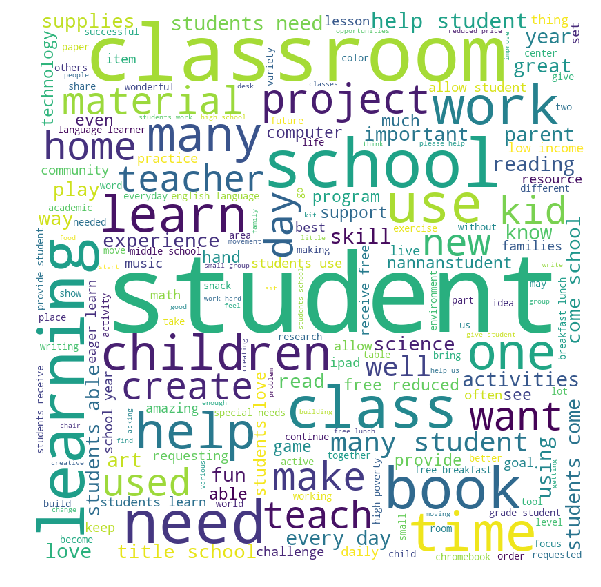

In [48]:
from wordcloud import WordCloud

negative_string=''
for neg in X_negative_essay:
    negative_string+=neg

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(negative_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Lets Draw the word cloud for Positive Data points

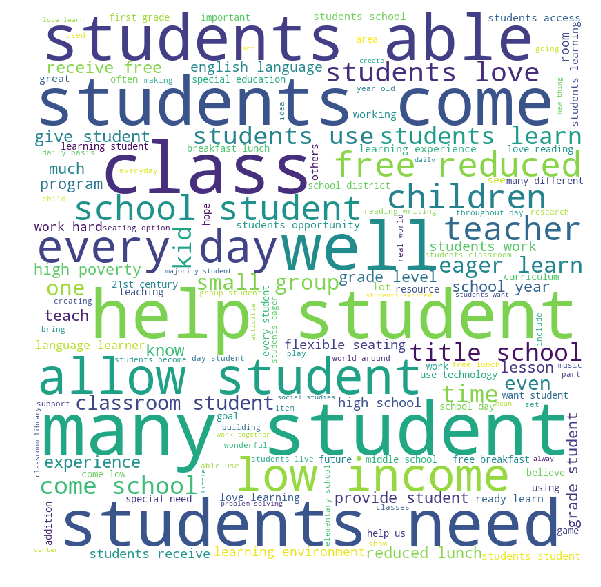

In [49]:
from wordcloud import WordCloud

positive_string=''
for pos in X_positive_essay:
    positive_string+=pos

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(positive_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### --  essays containg more occurance of the stem word "student" get clustered into one cluster. I am assuming these were the projects that were approved 

### --  essays containg lesser occurance of the stem word "student" get clustered into another cluster. I am assuming these were the projects that weren't approved 